<a href="https://colab.research.google.com/github/RAFS20/Analisis-de-datos/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis Function

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import variation

# Global configuration to display only 2 decimals
import sys
sys.displayhook = lambda x: print(f'{round(x, 2):.2f}')
sns.set(style='white')
plt.rcParams.update({'font.family': 'Liberation Serif', 'font.size': 12})

def load_dataset(file_path):
    """
    Loads the dataset from a CSV file.
    
    Args:
        file_path (str): Path to the CSV file.
    
    Returns:
        pd.DataFrame: The loaded dataset as a Pandas DataFrame.
    """
    return pd.read_csv(file_path)

def summarize_dataset(dataset):
    """
    Shows a general summary of the dataset, including information about the number of rows and columns.
    
    Args:
        dataset (pd.DataFrame): The dataset to summarize.
    """
    print("Dataset Summary:")
    print("Number of rows:", dataset.shape[0])
    print("Number of columns:", dataset.shape[1])
    print()

def analyze_missing_values(dataset):
    """
    Analyzes missing values in the dataset and displays a summary.
    
    Args:
        dataset (pd.DataFrame): The dataset to analyze.
    """
    missing_values = dataset.isnull().sum()
    print("Missing values per column:")
    print(missing_values)
    print()

def analyze_numeric_variables(dataset, save_path):
    """
    Performs an analysis of the numeric variables in the dataset and displays descriptive statistics.
    It also plots histograms and pie charts for each numeric variable and saves the plots in the specified folder.
    
    Args:
        dataset (pd.DataFrame): The dataset to analyze.
        save_path (str): Path of the folder to save the plots.
    """
    numeric_columns = dataset.select_dtypes(include=[np.number])
    if len(numeric_columns) > 0:
        print("Numeric variables:")
        print(numeric_columns.describe())
        print()

        os.makedirs(save_path, exist_ok=True)  # Create the folder if it doesn't exist

        # Plot histograms and pie charts for each numeric variable and save the plots
        for column in numeric_columns:
            plt.figure(figsize=(12, 4))

            # Histogram
            plt.subplot(1, 2, 1)
            sns.histplot(data=dataset, x=column, kde=True)
            plt.axvline(dataset[column].median(), color='red', linestyle='--', label=f'Median: {dataset[column].median():.2f}')
            plt.axvline(dataset[column].mean(), color='green', linestyle='--', label=f'Mean: {dataset[column].mean():.2f} CV: {(dataset[column].std() / dataset[column].mean() * 100):.2f}%')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.title('Histogram of ' + column)
            plt.legend()

            # Pie chart with ranges
            plt.subplot(1, 2, 2)
            ranges = pd.qcut(dataset[column], q=5)  # Divide the variable into 5 ranges
            range_counts = ranges.value_counts(normalize=True)

            # Convert the intervals into readable labels and limit them to 2 decimals
            labels = [f'{interval.left:.2f} - {interval.right:.2f}' for interval in range_counts.index]

            # Configure the format of values in the pie chart
            plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda value, _: '{:.2%}'.format(value)))

            plt.pie(range_counts, labels=labels, autopct='%.2f%%', startangle=90)
            plt.title('Pie Chart - Ranges of ' + column)

            plt.suptitle('Analysis of ' + column, y=1.05)
            plt.tight_layout()
            plt.savefig(os.path.join(save_path, 'analysis_' + column + '.svg'), format='svg')
            plt.show()

        print()
    else:
        print("No numeric variables found in the dataset.")
        print()

def analyze_categorical_variables(dataset, save_path):
    """
    Performs an analysis of the categorical variables in the dataset and displays descriptive statistics.
    It also plots pie charts and bar charts for each categorical variable and saves the plots in the specified folder.
    
    Args:
        dataset (pd.DataFrame): The dataset to analyze.
        save_path (str): Path of the folder to save the plots.
    """
    categorical_columns = dataset.select_dtypes(include=['object', 'category'])
    if len(categorical_columns) > 0:
        print("Categorical variables:")
        for column in categorical_columns:
            print("Column:", column)
            print("Unique values:", dataset[column].unique())
            print("Value counts:")
            print(dataset[column].value_counts())
            print("Value proportions:")
            proportions = dataset[column].value_counts(normalize=True).map('{:.2%}'.format)
            print(proportions)
            print()

            os.makedirs(save_path, exist_ok=True)  # Create the folder if it doesn't exist

            # Plot pie charts and bar charts for each categorical variable and save the plots
            plt.figure(figsize=(12, 4))

            # Pie chart
            plt.subplot(1, 2, 1)
            category_counts = dataset[column].value_counts(normalize=True)
            plt.pie(category_counts, labels=category_counts.index, autopct='%.2f%%', startangle=90)
            plt.title('Pie Chart - ' + column)

            # Bar chart
            plt.subplot(1, 2, 2)
            bar_counts = dataset[column].value_counts()
            plt.bar(bar_counts.index.astype(str), bar_counts.values)
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.title('Bar Chart - ' + column)
            plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda value, _: '{:.2f}'.format(value)))

            plt.suptitle('Analysis of ' + column, y=1.05)
            plt.tight_layout()
            plt.savefig(os.path.join(save_path, 'analysis_' + column + '.svg'), format='svg')
            plt.show()

    else:
        print("No categorical variables found in the dataset.")
        print()

def combine_categorical_numeric_variables(dataset, save_path):
    """
    Combines all categorical variables with all numeric variables into plots and saves the plots as .svg files
    in the specified folder.
    
    Args:
        dataset (pd.DataFrame): The dataset to analyze.
        save_path (str): Path of the folder to save the plots.
    """
    os.makedirs(save_path, exist_ok=True)  # Create the folder if it doesn't exist

    categorical_columns = dataset.select_dtypes(include=['object', 'category'])
    numeric_columns = dataset.select_dtypes(include=[np.number])

    if len(categorical_columns) > 0 and len(numeric_columns) > 0:
        for cat_column in categorical_columns:
            for num_column in numeric_columns:
                plt.figure(figsize=(12, 6))
                
                # Boxplot
                plt.subplot(1, 3, 1)
                sns.boxplot(data=dataset, x=cat_column, y=num_column)
                median_values = dataset.groupby(cat_column)[num_column].median()
                for i, median in enumerate(median_values):
                    plt.text(i, median, f'{median:.2f}', horizontalalignment='center', color='white', weight='bold')
                plt.xlabel(cat_column)
                plt.ylabel(num_column)
                plt.title(f'Boxplot of {num_column} by {cat_column}')
                plt.xticks(rotation=45)
                
                # Histograms
                plt.subplot(1, 3, 2)
                for category in dataset[cat_column].unique():
                    sns.kdeplot(data=dataset[dataset[cat_column] == category], x=num_column, label=str(category), linewidth=2)
                median_values_line = dataset.groupby(cat_column)[num_column].median()
                for i, median in enumerate(median_values_line):
                    plt.axvline(median, color=sns.color_palette()[i], linestyle='--', linewidth=2)
                plt.xlabel(num_column)
                plt.ylabel('Density')
                plt.title(f'Histogram of {num_column} by {cat_column}')
                plt.legend()

                # Stacked bar chart
                plt.subplot(1, 3, 3)
                ranges = pd.qcut(dataset[num_column], q=5)  # Divide the variable into 5 ranges
                range_labels = [f'{interval.left:.2f} - {interval.right:.2f}' for interval in pd.Categorical(ranges).categories]  # Convert intervals into readable labels
                stacked_counts = dataset.groupby([ranges, cat_column]).size().unstack().apply(lambda x: x / x.sum(), axis=1)
                stacked_counts.plot(kind='bar', stacked=True, ax=plt.gca())
                plt.xlabel('Range of ' + num_column)
                plt.ylabel('Percentage')
                plt.title(f'Stacked Bar Chart - Ranges of {num_column} divided by {cat_column}')
                plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda value, _: '{:.2%}'.format(value)))

                # Add percentage data labels on the stacked bars
                for rect in plt.gca().patches:
                    width = rect.get_width()
                    height = rect.get_height()
                    x = rect.get_x()
                    y = rect.get_y()
                    label_text = f'{height:.0%}'  # Remove decimals in percentage data labels
                    label_x = x + width / 2
                    label_y = y + height / 2
                    plt.text(label_x, label_y, label_text, ha='center', va='center')
                    
                plt.xticks(range(len(range_labels)), range_labels, rotation=45)  # Use readable labels on the x-axis

                plt.suptitle(f'Analysis of {num_column} by {cat_column}', y=1.05)
                plt.tight_layout()
                plt.savefig(os.path.join(save_path, f'analysis_{num_column}_by_{cat_column}.svg'), format='svg')
                plt.show()
    else:
        print("No categorical or numeric variables found in the dataset.")
        print()

def analyze_dataset(dataset):
    """
    Performs an analysis of the dataset, including a general summary, analysis of missing values,
    analysis of numeric variables, analysis of categorical variables, and combination of categorical and numeric variables.
    Saves the plots in separate folders.
    
    Args:
        dataset (pd.DataFrame): The dataset to analyze.
    """
    summarize_dataset(dataset)
    analyze_missing_values(dataset)
    analyze_numeric_variables(dataset, 'numeric_variables')
    analyze_categorical_variables(dataset, 'categorical_variables')
    combine_categorical_numeric_variables(dataset, 'combined_plots')


# Implementation of the data analysis function

In [4]:
import pandas as pd
import numpy as np

# Define the size of the dataset
num_rows = 100

# Define the columns and variable types
columns = ['ID', 'Age', 'Height', 'Weight', 'Income', 'Category', 'Variable1', 'Variable2']
types = [np.int64, np.int64, np.float64, np.float64, np.float64, 'category', 'category', 'category']

# Generate simulated data
data = {
    'ID': np.arange(num_rows),
    'Age': np.random.randint(18, 65, size=num_rows),
    'Height': np.random.normal(170, 10, size=num_rows),
    'Weight': np.random.normal(65, 12, size=num_rows),
    'Income': np.random.uniform(20000, 100000, size=num_rows),
    'Category': np.random.choice(['A', 'B', 'C'], size=num_rows),
    'Variable1': np.random.choice(['X', 'Y', 'Z'], size=num_rows),
    'Variable2': np.random.choice(['P', 'Q', 'R'], size=num_rows)
}

# Create the DataFrame
df = pd.DataFrame(data, columns=columns).astype(dict(zip(columns, types)))

# Display the DataFrame
print(df.head())


   ID  Age      Height     Weight        Income Category Variable1 Variable2
0   0   48  168.984741  64.307725  84516.183635        C         X         Q
1   1   42  165.135696  64.970839  51761.271807        C         Y         P
2   2   22  169.241683  60.166321  49465.151597        B         X         P
3   3   42  162.537377  65.384741  26407.840017        A         X         P
4   4   36  168.927147  35.103762  48371.125866        B         Y         P


Dataset Summary:
Number of rows: 100
Number of columns: 8

Missing values per column:
ID           0
Age          0
Height       0
Weight       0
Income       0
Category     0
Variable1    0
Variable2    0
dtype: int64

Numeric variables:
               ID         Age      Height      Weight        Income
count  100.000000  100.000000  100.000000  100.000000    100.000000
mean    49.500000   43.170000  170.414867   64.571260  56374.399946
std     29.011492   13.091793    9.702977   12.550143  21587.048478
min      0.000000   18.000000  148.827610   21.997121  20156.616762
25%     24.750000   33.000000  164.866784   58.016180  39887.005082
50%     49.500000   43.000000  168.890731   64.800220  52313.485320
75%     74.250000   53.250000  177.089533   72.447955  72971.810829
max     99.000000   64.000000  193.864653   98.650635  96705.981084



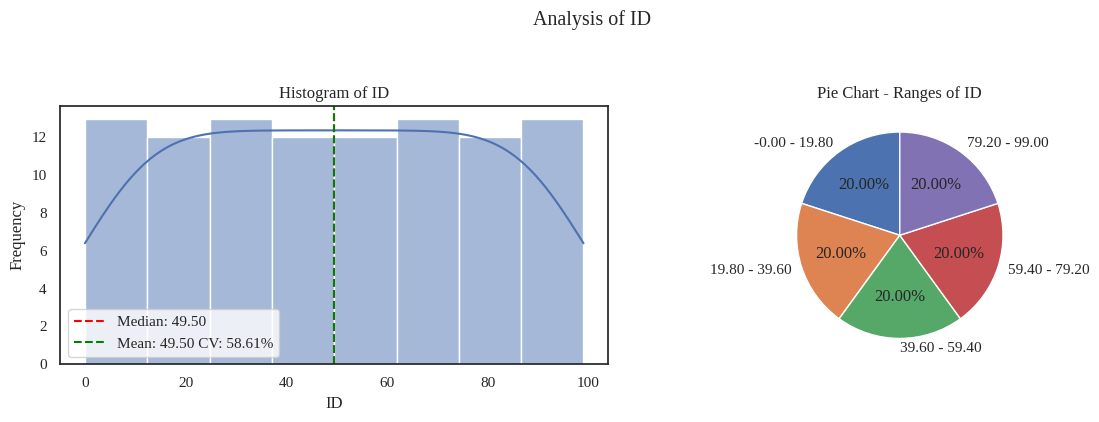

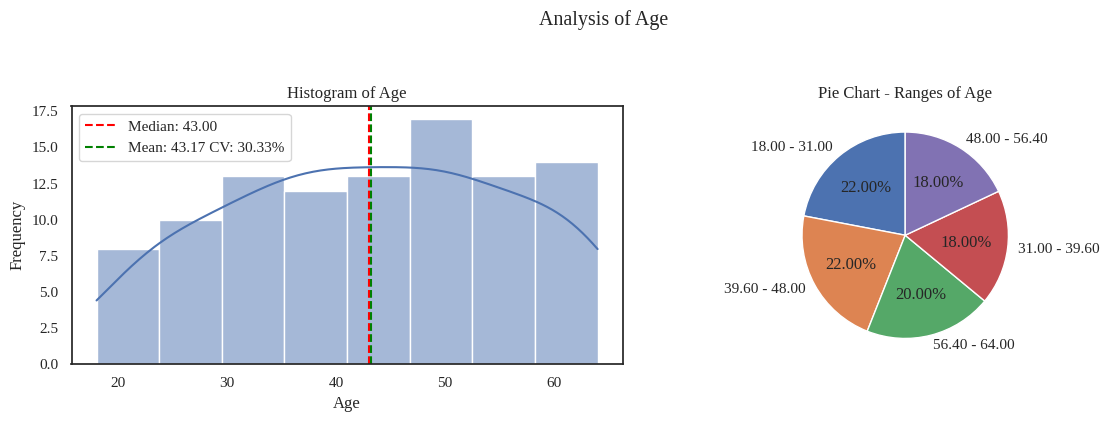

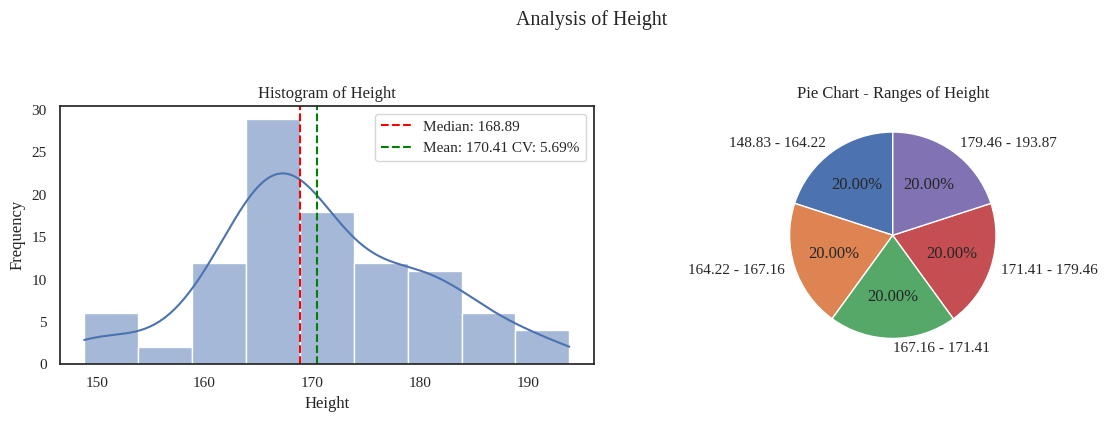

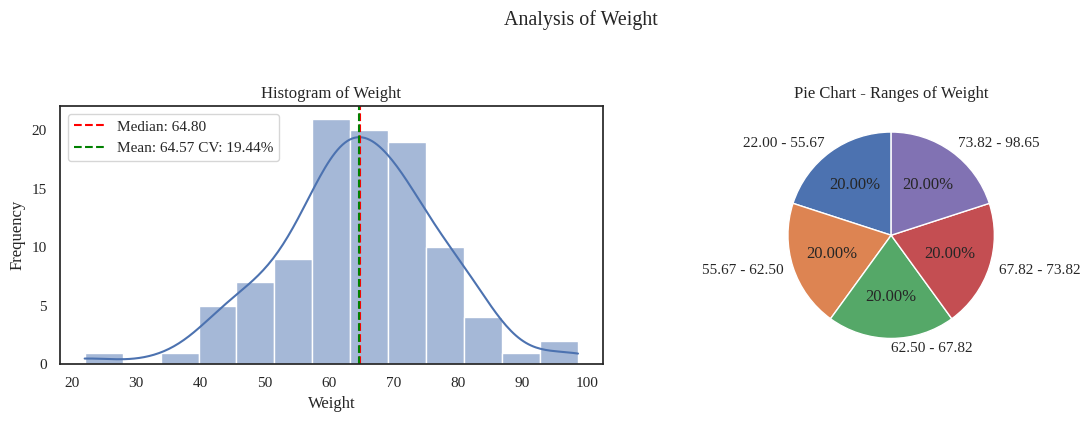

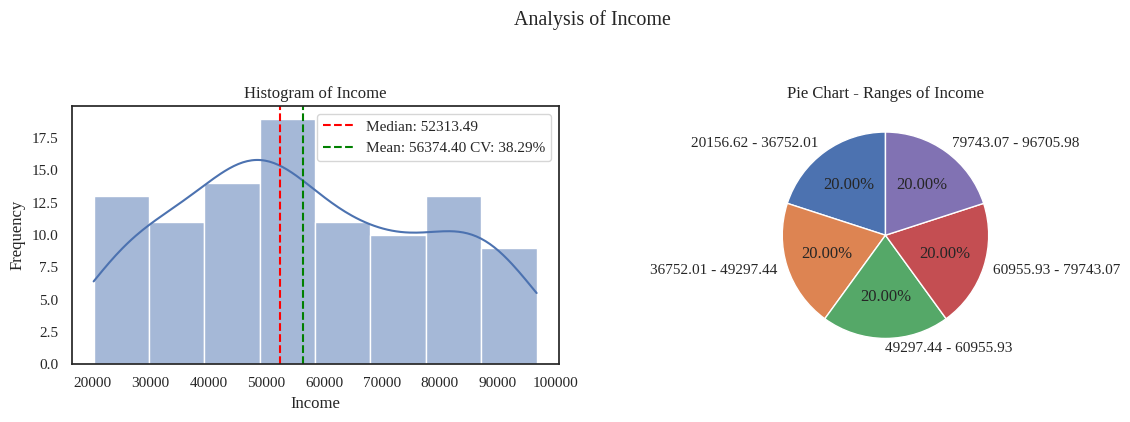


Categorical variables:
Column: Category
Unique values: ['C', 'B', 'A']
Categories (3, object): ['A', 'B', 'C']
Value counts:
C    35
A    33
B    32
Name: Category, dtype: int64
Value proportions:
C    35.00%
A    33.00%
B    32.00%
Name: Category, dtype: object



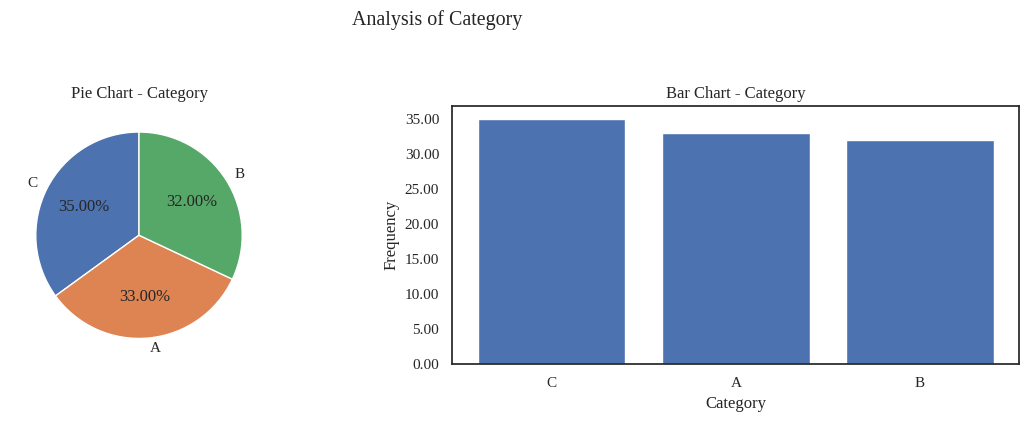

Column: Variable1
Unique values: ['X', 'Y', 'Z']
Categories (3, object): ['X', 'Y', 'Z']
Value counts:
Z    35
X    33
Y    32
Name: Variable1, dtype: int64
Value proportions:
Z    35.00%
X    33.00%
Y    32.00%
Name: Variable1, dtype: object



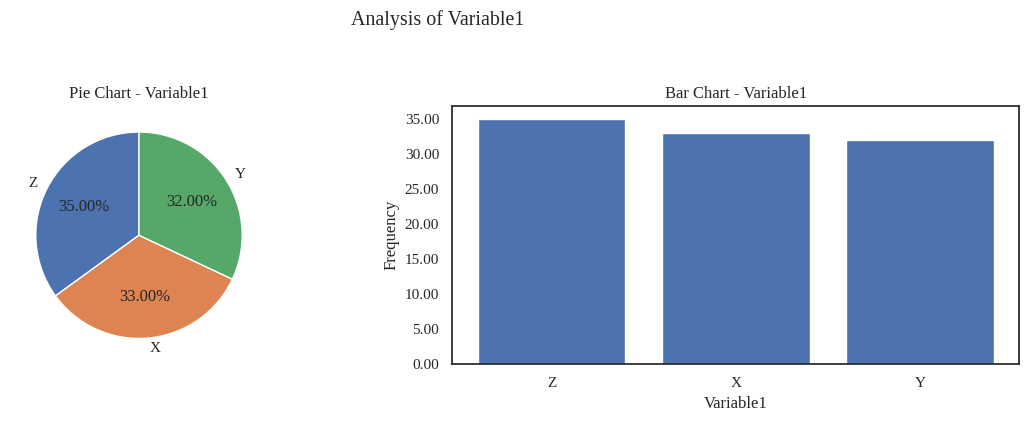

Column: Variable2
Unique values: ['Q', 'P', 'R']
Categories (3, object): ['P', 'Q', 'R']
Value counts:
P    38
R    33
Q    29
Name: Variable2, dtype: int64
Value proportions:
P    38.00%
R    33.00%
Q    29.00%
Name: Variable2, dtype: object



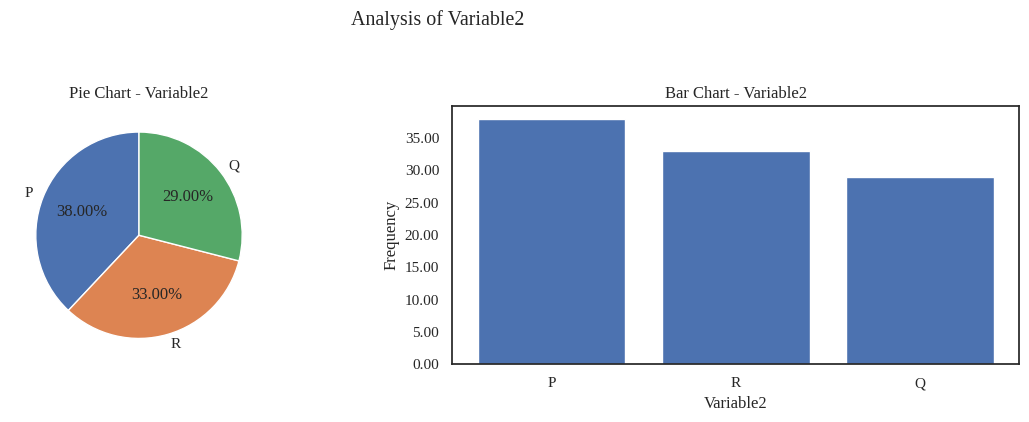

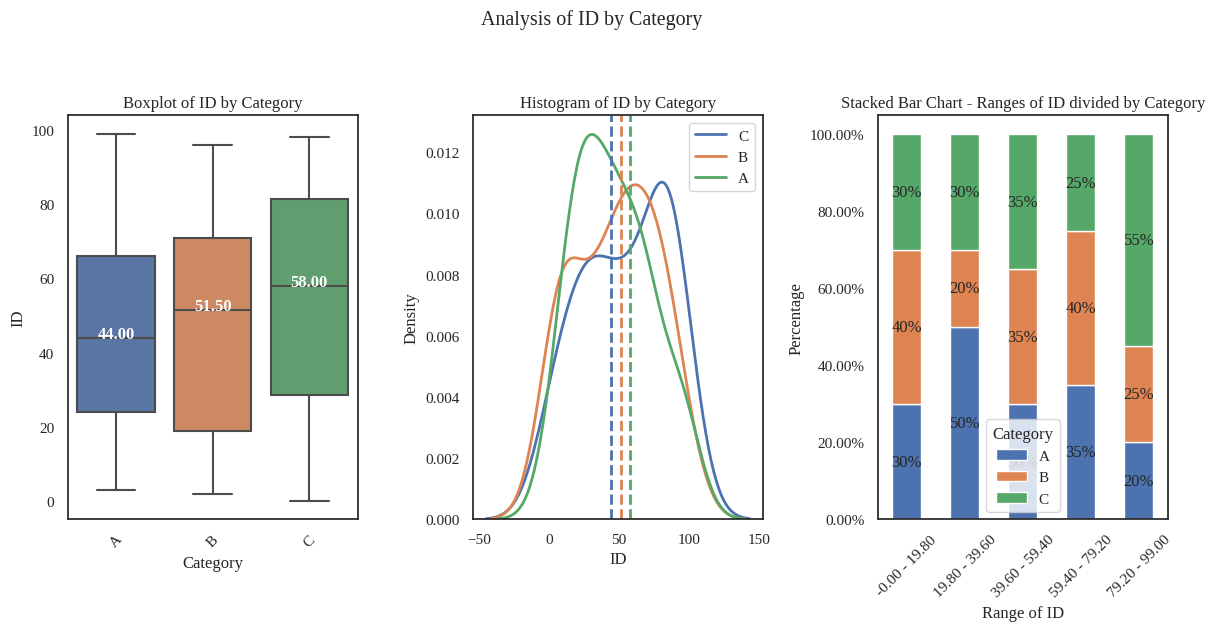

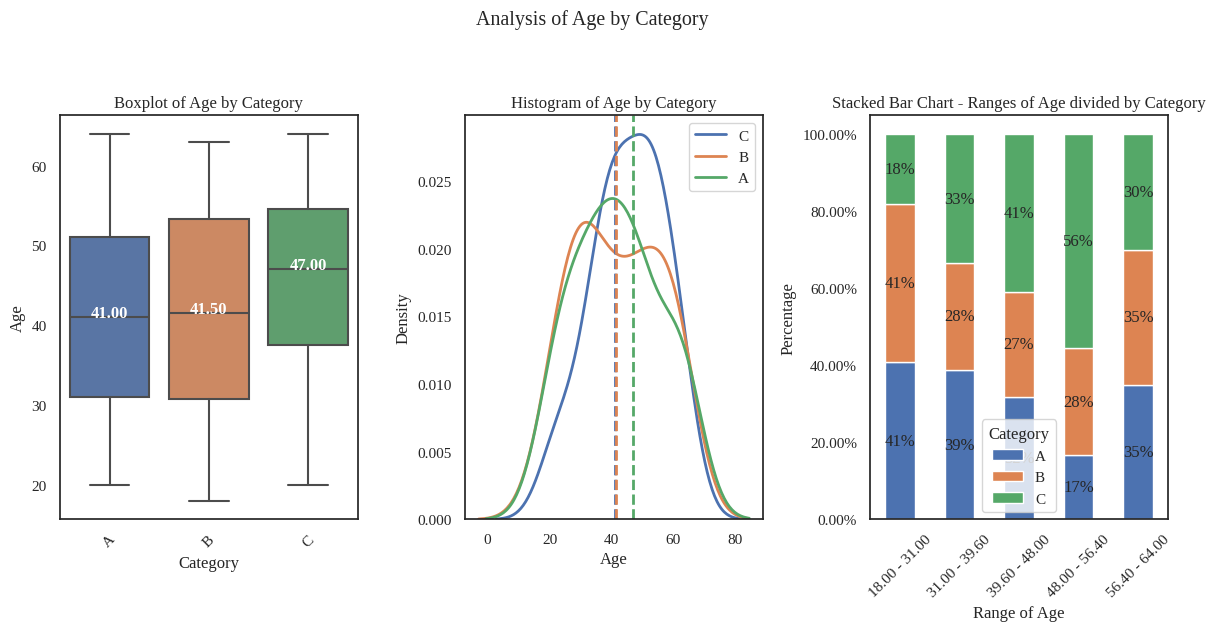

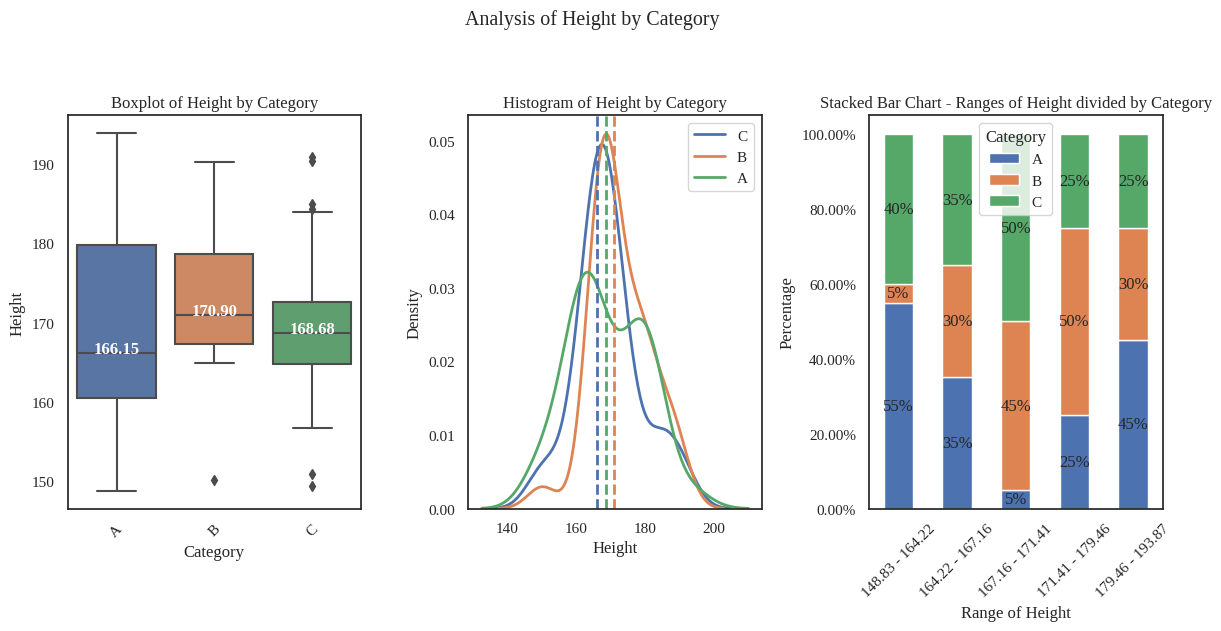

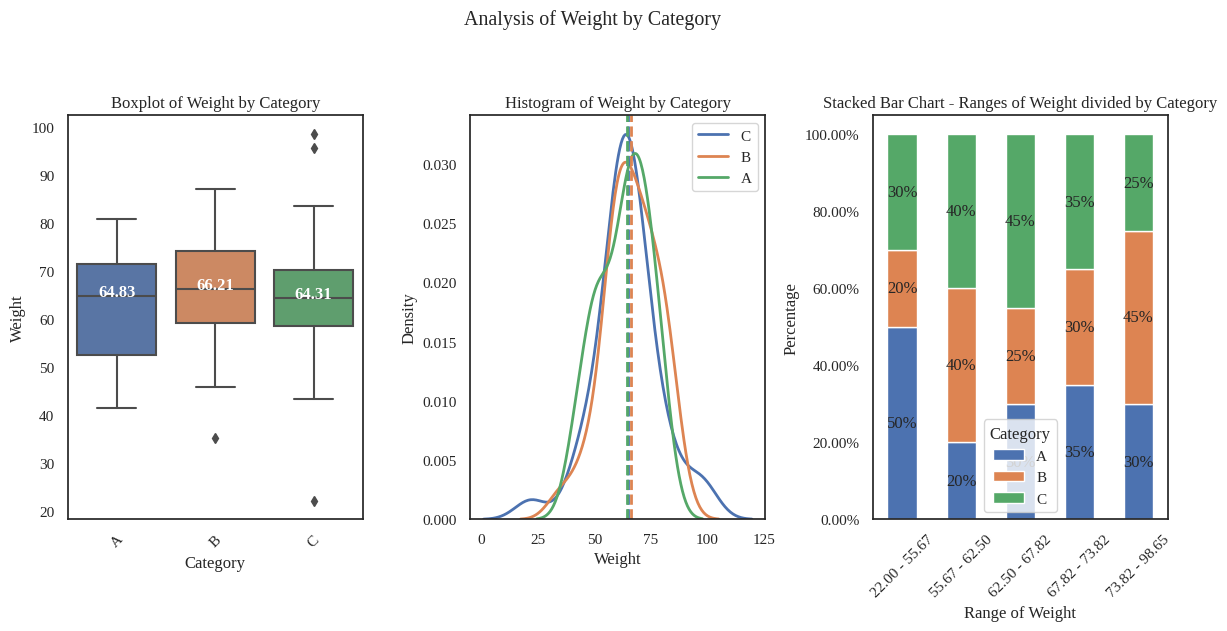

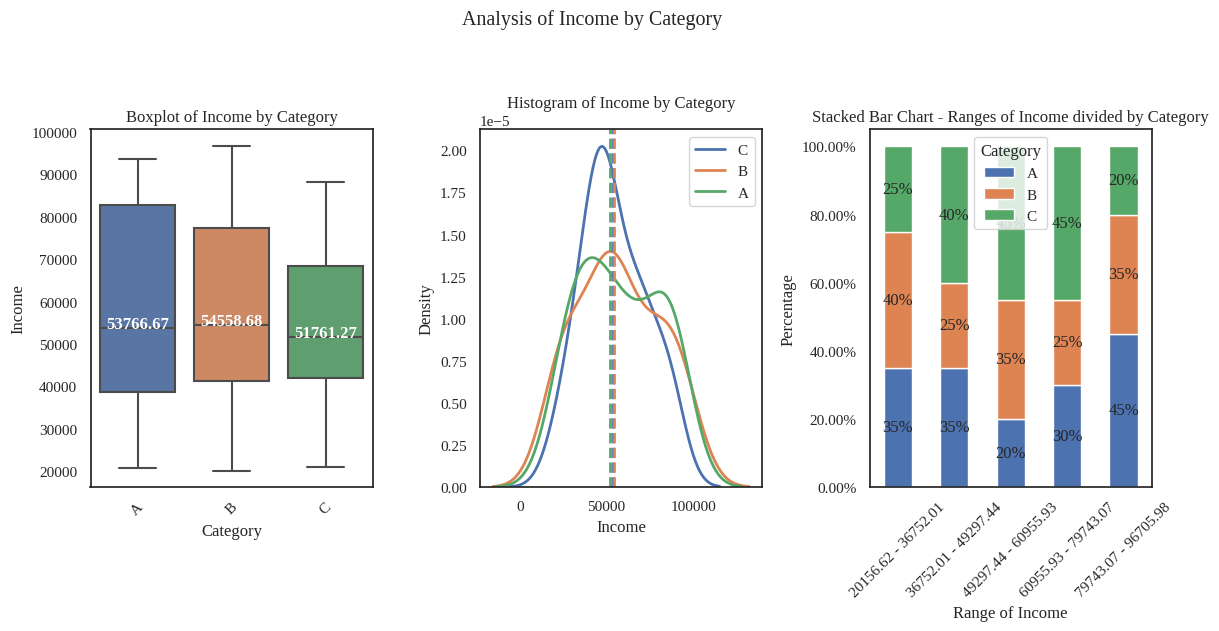

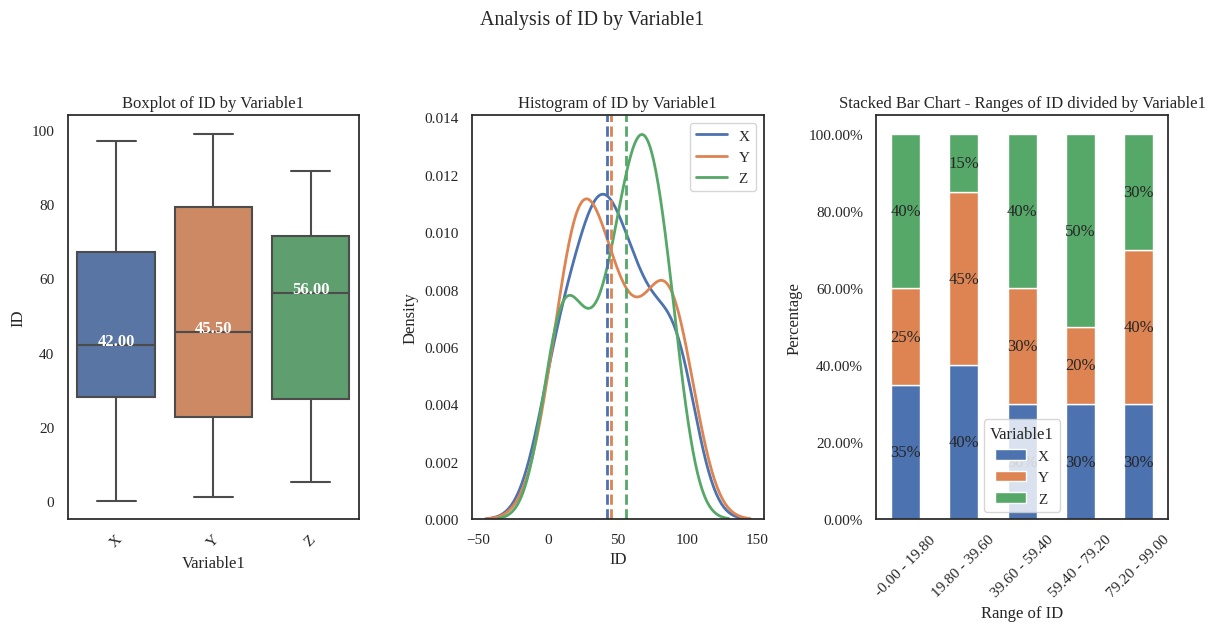

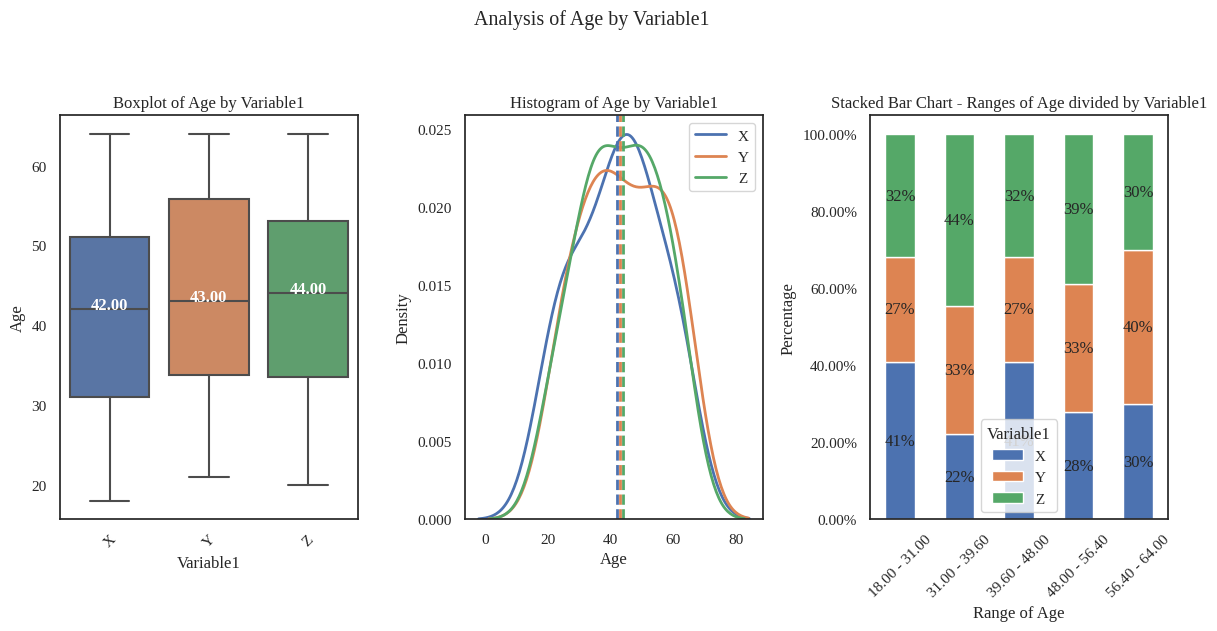

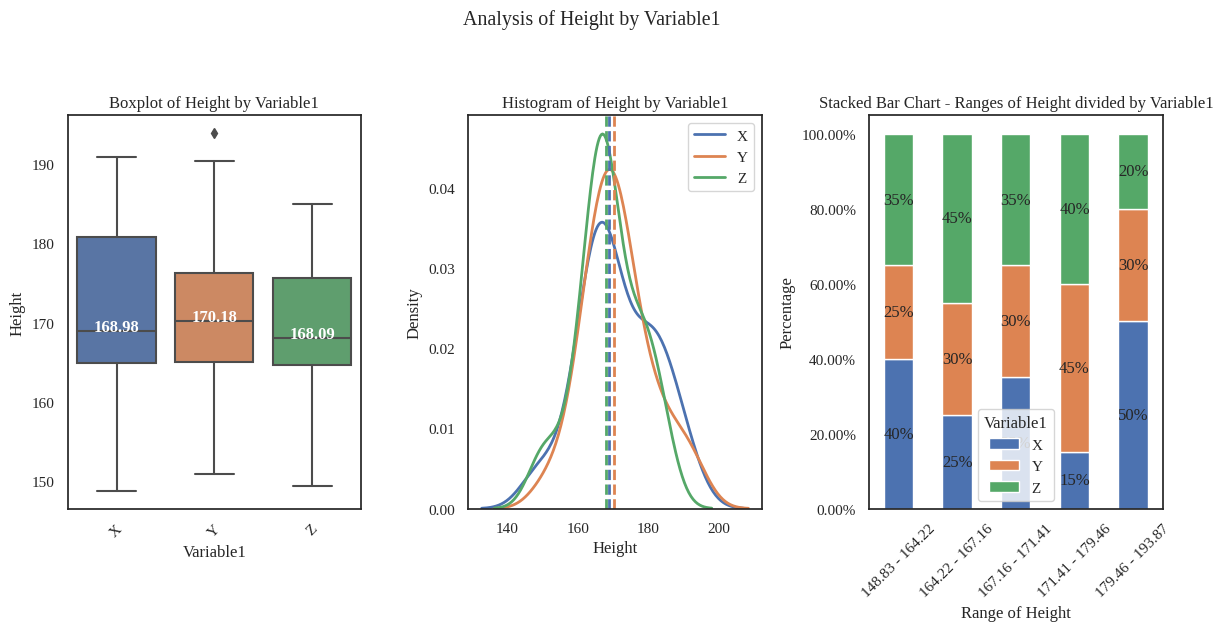

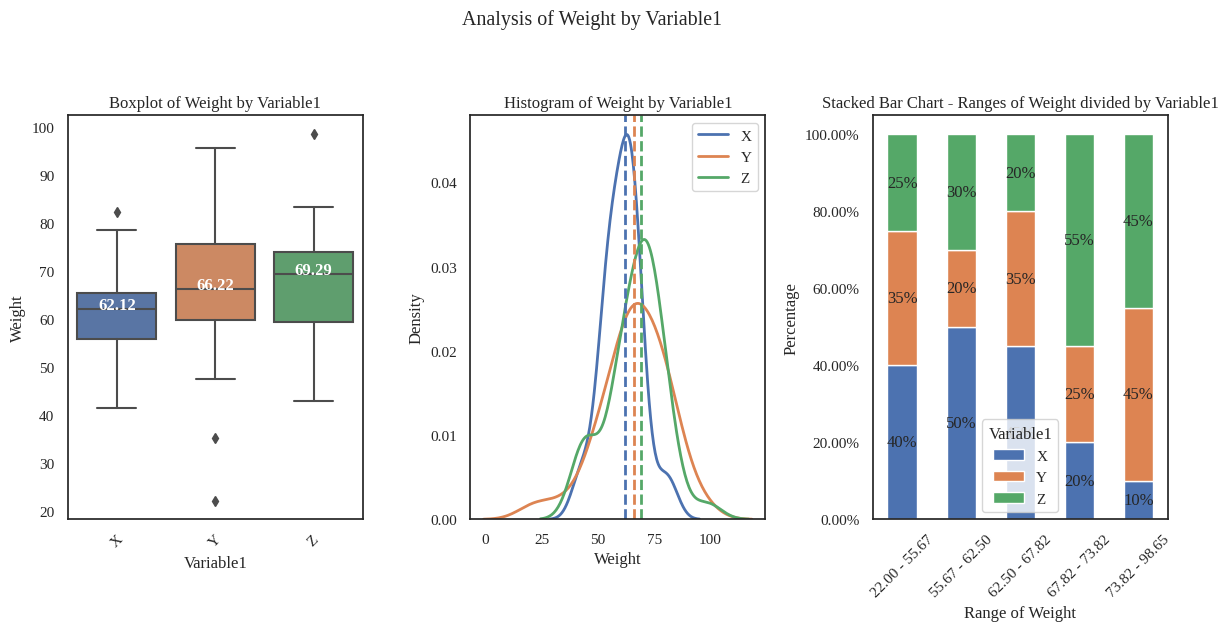

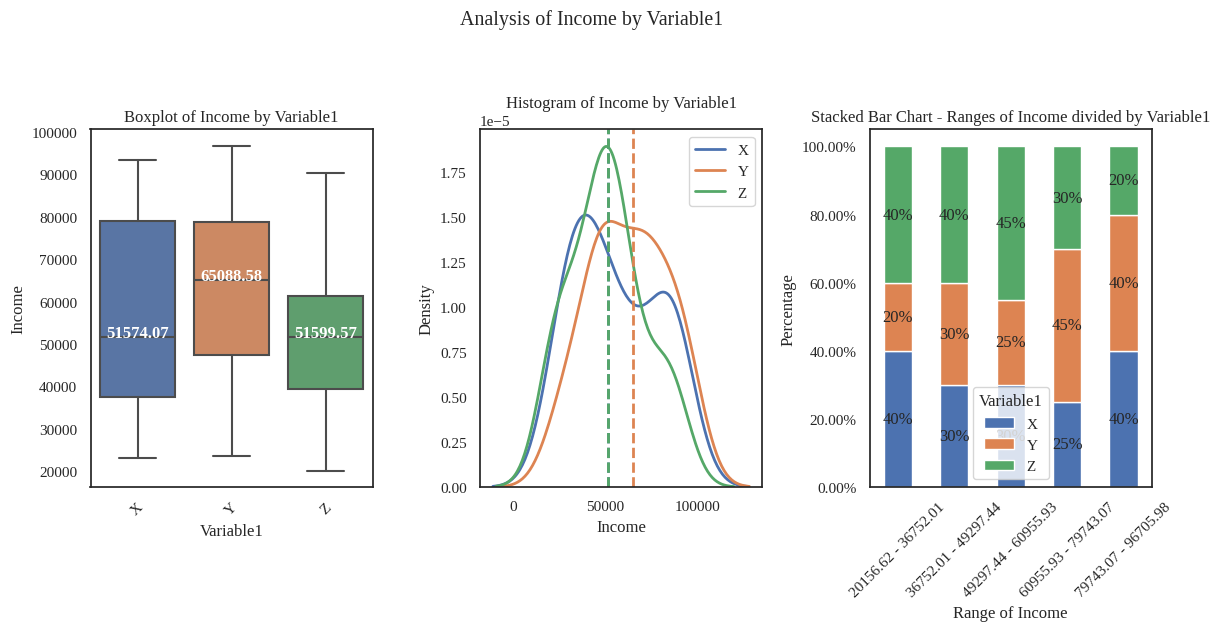

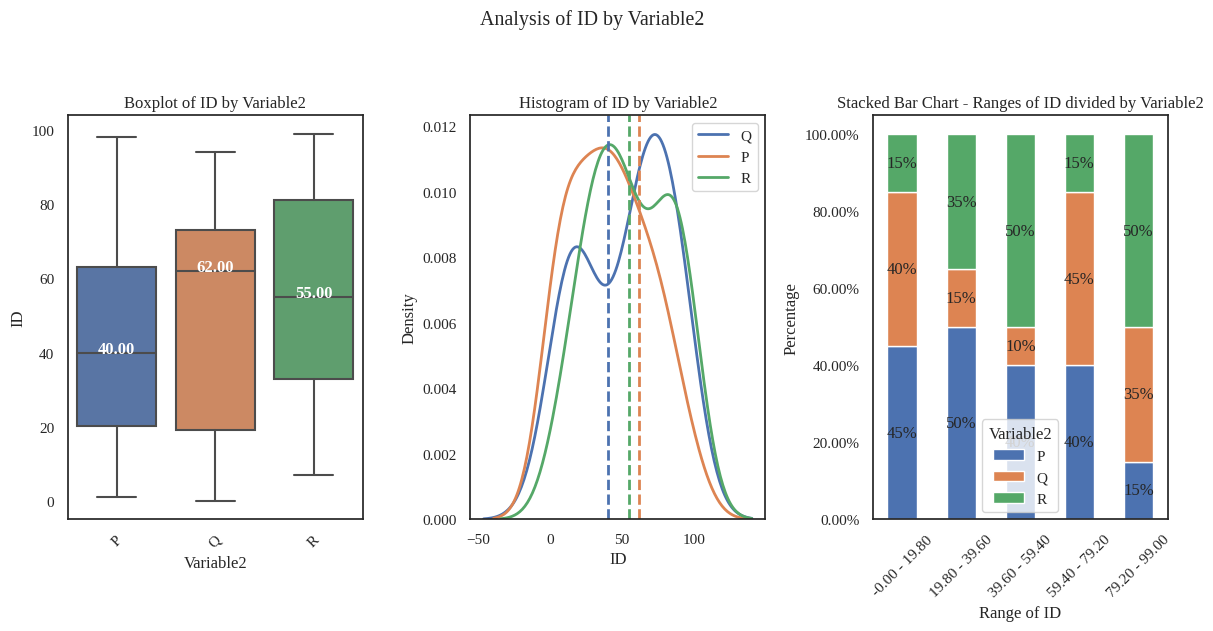

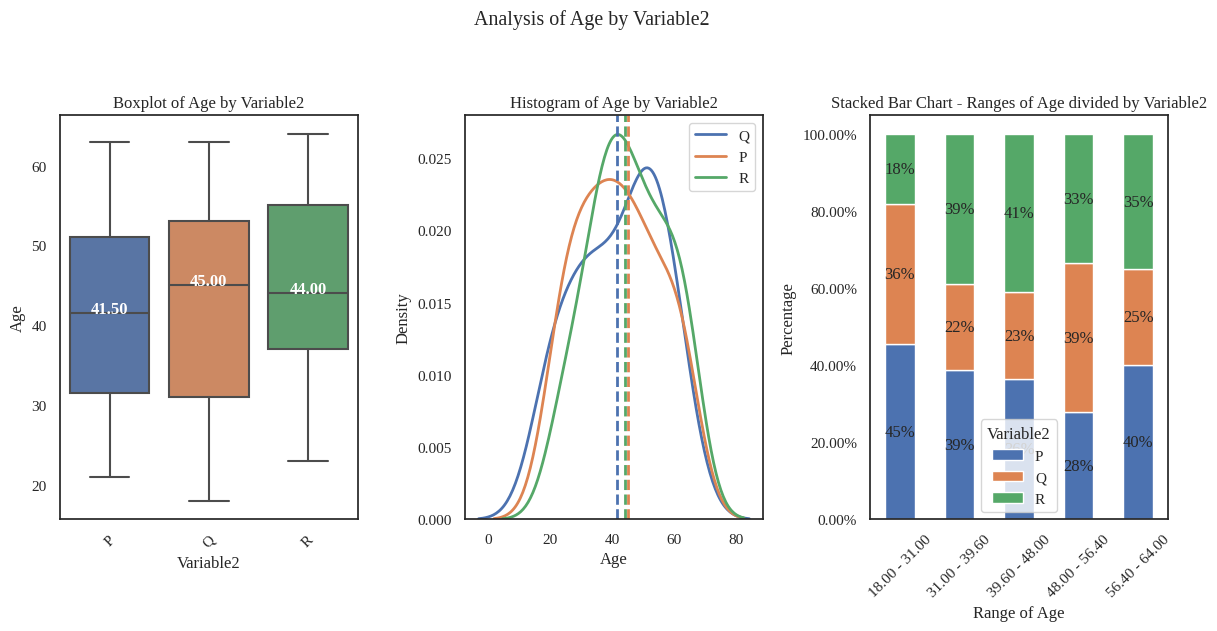

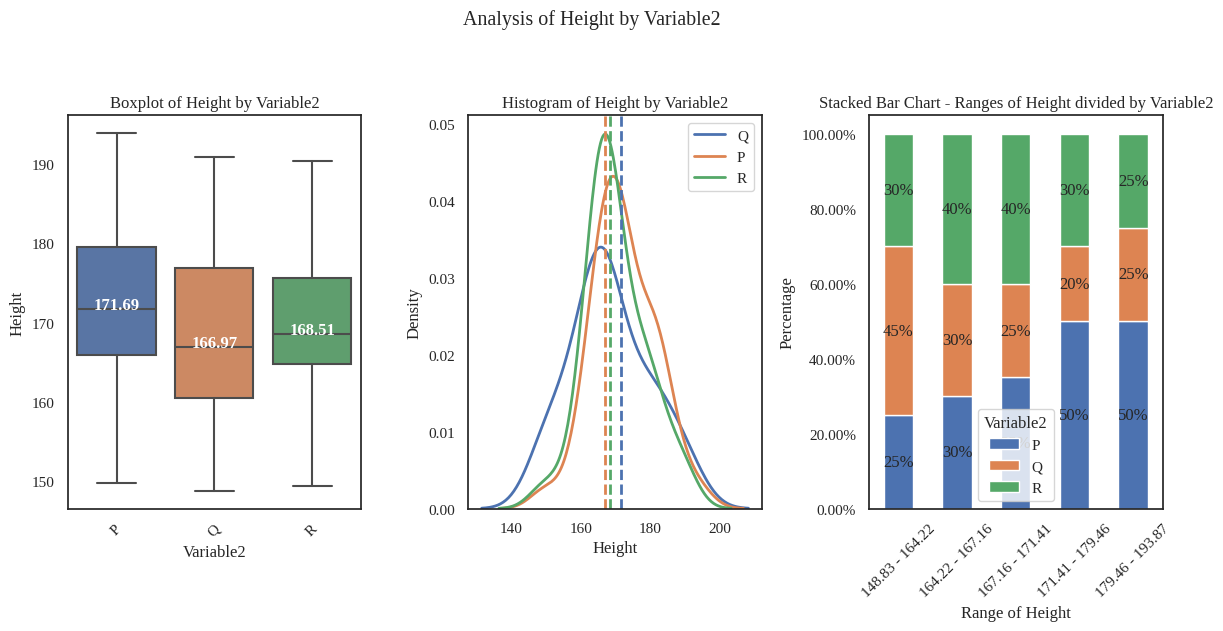

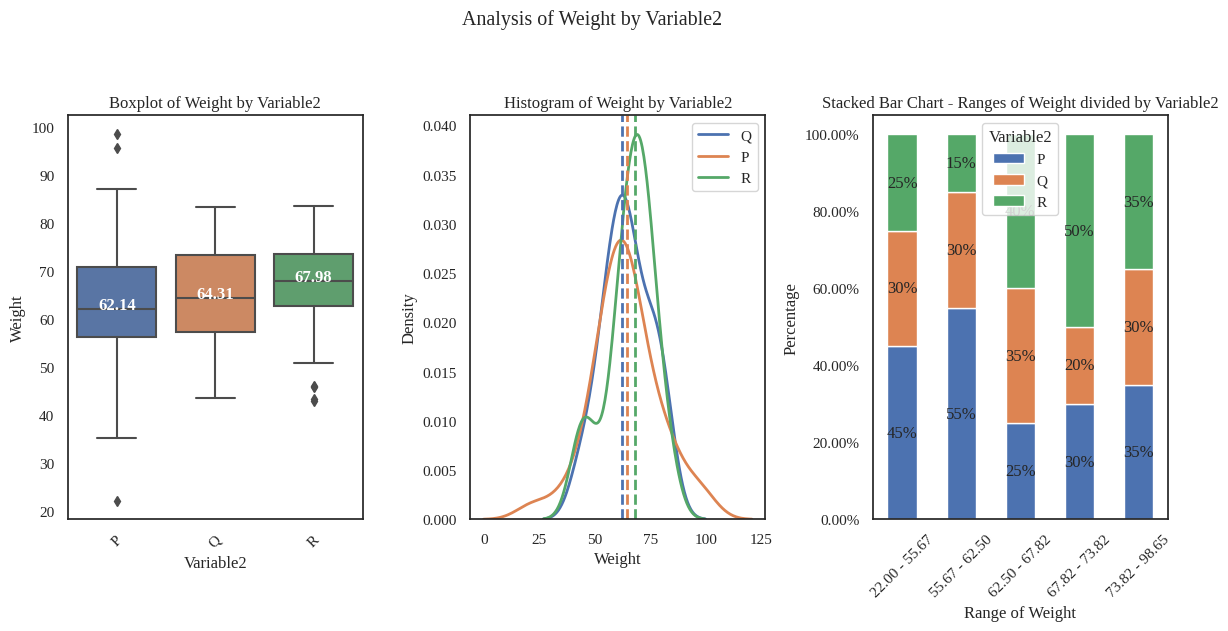

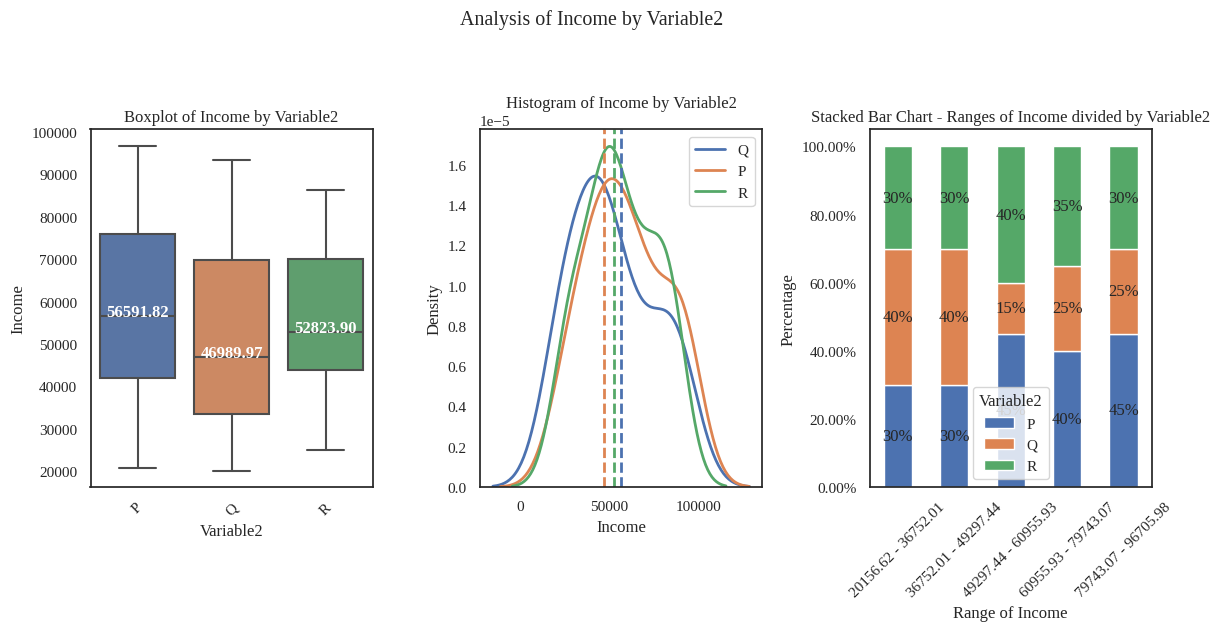

In [5]:
# Run the data analysis function
analyze_dataset(df)